A Weather Prediction Project Using Linear Regression

In [1714]:
#from google.colab import drive
#drive.mount("/content/drive")

In [1715]:
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow streamlit

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [1716]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1718]:
#df1 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet bangladesh 2022-05-01 to 2025-01-23.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet, bangladesh 2019-09-05 to 2022-05-30.csv')
#df3 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet, bangladesh 2016-12-11 to 2019-09-05.csv')
#df4 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet, bangladesh 2014-03-20 to 2016-12-12.csv')


In [1719]:
#sylhet_weather_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
#sylhet_weather_df.to_csv('sylhet_weather.csv', index=False)

In [1720]:
#from google.colab import files
#files.download('sylhet_weather.csv')

In [1721]:
df = pd.read_csv('..\Data\sylhet_weather.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\USER\AppData\Local\Temp\ipykernel_7596\1746279886.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('..\Data\sylhet_weather.csv')


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,sylhet bangladesh,2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,...,18.6,8,30.0,2022-05-01T05:17:15,2022-05-01T18:22:24,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999"
1,sylhet bangladesh,2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,...,16.5,7,30.0,2022-05-02T05:16:31,2022-05-02T18:22:53,0.05,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999"
2,sylhet bangladesh,2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,...,17.9,7,30.0,2022-05-03T05:15:48,2022-05-03T18:23:23,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999"
3,sylhet bangladesh,2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,...,19.5,8,30.0,2022-05-04T05:15:07,2022-05-04T18:23:53,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999"
4,sylhet bangladesh,2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,...,23.0,8,30.0,2022-05-05T05:14:26,2022-05-05T18:24:23,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42618099999,42515099999,remote,42516099999"


In [1722]:
print(df.isnull().sum())
print('\n')
print(df.duplicated().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1342
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            18
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2997
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


1


In [1723]:
df.shape

(3996, 33)

In [1724]:
df['preciptype'].value_counts()

preciptype
rain    2654
Name: count, dtype: int64

In [1725]:
df['preciptype'] = df['preciptype'].fillna('clear')
df['preciptype'].value_counts()

preciptype
rain     2654
clear    1342
Name: count, dtype: int64

In [1726]:
df = df.drop(['severerisk'], axis=1)

In [1727]:
df = df.drop_duplicates(subset=['datetime'])

In [1728]:
df.shape

(3963, 32)

In [1729]:
print(df.isnull().sum())
print('\n')
print(df.duplicated().sum())

name                 0
datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility          18
solarradiation       0
solarenergy          0
uvindex              0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
dtype: int64


0


In [1730]:
df['visibility'].value_counts().sort_index()

visibility
0.7       1
0.9       2
1.0       1
1.1       1
1.2       4
         ..
22.7      1
23.2      1
23.3      1
24.1      5
1101.4    1
Name: count, Length: 188, dtype: int64

In [1731]:
df['visibility'] = df['visibility'].ffill()

In [1732]:
df['conditions'].value_counts()

conditions
Rain, Partially cloudy    1509
Rain, Overcast            1043
Clear                      743
Partially cloudy           592
Rain                        69
Overcast                     7
Name: count, dtype: int64

In [1733]:
df['conditions'] = df['conditions'].replace({
    'Rain': 'Rain, Partially cloudy',
    'Overcast': 'Rain, Overcast'
})

In [1734]:
df['conditions'].value_counts()

conditions
Rain, Partially cloudy    1578
Rain, Overcast            1050
Clear                      743
Partially cloudy           592
Name: count, dtype: int64

In [1735]:
display(df.head())

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,sylhet bangladesh,2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,...,215.7,18.6,8,2022-05-01T05:17:15,2022-05-01T18:22:24,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999"
1,sylhet bangladesh,2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,...,193.6,16.5,7,2022-05-02T05:16:31,2022-05-02T18:22:53,0.05,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999"
2,sylhet bangladesh,2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,...,204.9,17.9,7,2022-05-03T05:15:48,2022-05-03T18:23:23,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999"
3,sylhet bangladesh,2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,...,226.2,19.5,8,2022-05-04T05:15:07,2022-05-04T18:23:53,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999"
4,sylhet bangladesh,2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,...,263.0,23.0,8,2022-05-05T05:14:26,2022-05-05T18:24:23,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42618099999,42515099999,remote,42516099999"


In [1736]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,...,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,29.742998,19.038430,24.205501,33.936816,19.093641,26.070982,20.664194,82.080949,8.415468,66.136765,...,24.541509,9.827479,121.746404,1009.050896,56.595786,6.946076,174.373782,15.050568,6.555640,0.483987
std,3.404102,5.471891,4.181000,6.852786,5.607800,6.108550,4.808248,7.359500,18.164307,47.330435,...,8.273833,6.828476,97.134362,5.115979,33.555014,18.240000,58.533320,5.062207,1.802914,0.288690
min,18.100000,3.400000,12.400000,18.100000,2.600000,12.400000,8.300000,51.900000,0.000000,0.000000,...,8.600000,3.600000,0.000000,992.600000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000
25%,27.400000,14.900000,21.100000,27.900000,14.900000,21.050000,16.400000,77.200000,0.000000,0.000000,...,19.100000,7.100000,52.300000,1004.900000,24.700000,3.300000,141.000000,12.150000,6.000000,0.250000
50%,30.100000,19.700000,25.300000,33.900000,19.700000,26.200000,22.000000,82.400000,0.900000,100.000000,...,22.300000,7.600000,84.600000,1009.400000,59.600000,4.100000,179.700000,15.500000,7.000000,0.500000
75%,32.200000,23.800000,27.500000,39.600000,23.800000,30.800000,25.100000,87.500000,9.000000,100.000000,...,27.700000,10.900000,170.650000,1013.300000,91.050000,5.800000,212.700000,18.400000,8.000000,0.750000
max,38.800000,28.800000,32.600000,53.600000,36.800000,43.200000,28.000000,98.400000,202.000000,100.000000,...,95.800000,91.600000,359.900000,1019.800000,100.000000,1101.400000,316.100000,27.400000,10.000000,0.980000


In [1737]:
print("\nMissing Values in Dataset:\n", df.isnull().sum())


Missing Values in Dataset:
 name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64


In [1738]:
#sns.pairplot(df, hue='temp')
#plt.show()

In [1739]:
#df.to_csv('cleaned_df.csv', index=False)

In [1740]:
#from google.colab import files
#iles.download('cleaned_df.csv')

In [1741]:
df.set_index("datetime", inplace=True)

In [1742]:
df.index

Index(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
       '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
       ...
       '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05',
       '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10'],
      dtype='object', name='datetime', length=3963)

In [1743]:
df.index = pd.to_datetime(df.index)

In [1744]:
df.index

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10',
               ...
               '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
               '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
               '2016-12-09', '2016-12-10'],
              dtype='datetime64[ns]', name='datetime', length=3963, freq=None)

In [1745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3963 entries, 2022-05-01 to 2016-12-10
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3963 non-null   object 
 1   tempmax           3963 non-null   float64
 2   tempmin           3963 non-null   float64
 3   temp              3963 non-null   float64
 4   feelslikemax      3963 non-null   float64
 5   feelslikemin      3963 non-null   float64
 6   feelslike         3963 non-null   float64
 7   dew               3963 non-null   float64
 8   humidity          3963 non-null   float64
 9   precip            3963 non-null   float64
 10  precipprob        3963 non-null   int64  
 11  precipcover       3963 non-null   float64
 12  preciptype        3963 non-null   object 
 13  snow              3963 non-null   int64  
 14  snowdepth         3963 non-null   float64
 15  windgust          3963 non-null   float64
 16  windspeed         3963 n

In [1746]:
df.index.year.value_counts().sort_index()

datetime
2014    287
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025     23
Name: count, dtype: int64

In [1747]:
df = df.ffill()

In [1748]:
correlation_matrix = df.corr(numeric_only=True)

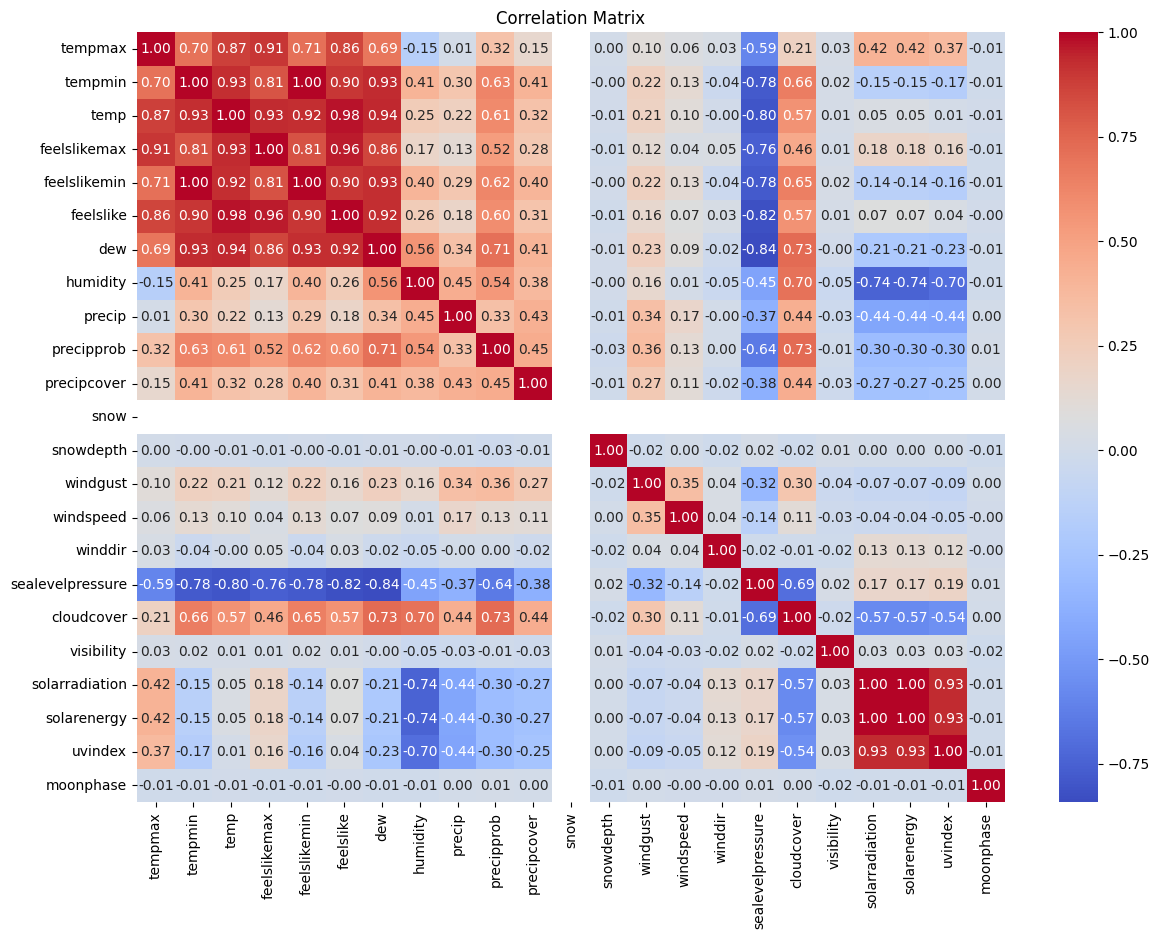

In [1749]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [1750]:
correlation_with_target = correlation_matrix['temp'].sort_values(ascending=False)
print(correlation_with_target)

temp                1.000000
feelslike           0.975603
dew                 0.941484
feelslikemax        0.929963
tempmin             0.926805
feelslikemin        0.924001
tempmax             0.871279
precipprob          0.607497
cloudcover          0.570974
precipcover         0.322960
humidity            0.252284
precip              0.219275
windgust            0.207151
windspeed           0.104514
solarenergy         0.047924
solarradiation      0.047489
visibility          0.014891
uvindex             0.009797
winddir            -0.002685
snowdepth          -0.005772
moonphase          -0.006898
sealevelpressure   -0.804470
snow                     NaN
Name: temp, dtype: float64


In [1751]:
df = df.drop(['name','stations','sunrise','sunset', 'description', 'sealevelpressure','winddir', 'moonphase','uvindex','windspeed'], axis=1)

In [1752]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,preciptype,snow,snowdepth,windgust,cloudcover,visibility,solarradiation,solarenergy,conditions,icon
datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,22.0,100,...,rain,0,0.0,26.3,57.3,18.8,215.7,18.6,"Rain, Partially cloudy",rain
2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,20.0,100,...,rain,0,0.0,22.3,59.1,18.8,193.6,16.5,"Rain, Partially cloudy",rain
2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,0.2,100,...,rain,0,0.0,24.1,66.5,18.2,204.9,17.9,"Rain, Partially cloudy",rain
2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,8.0,100,...,rain,0,0.0,24.8,52.7,19.0,226.2,19.5,"Rain, Partially cloudy",rain
2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,12.0,100,...,rain,0,0.0,21.2,45.3,18.7,263.0,23.0,"Rain, Partially cloudy",rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-06,29.6,13.1,20.6,29.0,13.1,20.5,14.1,69.0,0.0,0,...,clear,0,0.0,19.4,0.0,4.1,183.4,15.9,Clear,clear-day
2016-12-07,28.5,14.2,20.9,28.2,14.2,20.8,14.3,68.4,0.0,0,...,clear,0,0.0,18.4,0.0,4.2,182.6,15.9,Clear,clear-day
2016-12-08,28.8,14.0,20.5,28.5,14.0,20.5,14.2,69.7,0.0,0,...,clear,0,0.0,17.3,0.0,4.7,182.2,15.9,Clear,clear-day


In [1753]:
df['icon'] = df['icon'].replace({
    'cloudy': 'partly-cloudy-day',
    'fog': 'partly-cloudy-day',
    'wind': 'partly-cloudy-day'
})

In [1754]:
df['icon'].value_counts()

icon
rain                 2621
clear-day             737
partly-cloudy-day     605
Name: count, dtype: int64

In [1755]:
df.dtypes

tempmax           float64
tempmin           float64
temp              float64
feelslikemax      float64
feelslikemin      float64
feelslike         float64
dew               float64
humidity          float64
precip            float64
precipprob          int64
precipcover       float64
preciptype         object
snow                int64
snowdepth         float64
windgust          float64
cloudcover        float64
visibility        float64
solarradiation    float64
solarenergy       float64
conditions         object
icon               object
dtype: object

In [1756]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,cloudcover,visibility,solarradiation,solarenergy
count,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.0,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,29.742998,19.038430,24.205501,33.936816,19.093641,26.070982,20.664194,82.080949,8.415468,66.136765,16.857363,0.0,0.000177,24.541509,56.595786,6.946076,174.373782,15.050568
std,3.404102,5.471891,4.181000,6.852786,5.607800,6.108550,4.808248,7.359500,18.164307,47.330435,26.877262,0.0,0.009662,8.273833,33.555014,18.240000,58.533320,5.062207
min,18.100000,3.400000,12.400000,18.100000,2.600000,12.400000,8.300000,51.900000,0.000000,0.000000,0.000000,0.0,0.000000,8.600000,0.000000,0.700000,0.000000,0.000000
25%,27.400000,14.900000,21.100000,27.900000,14.900000,21.050000,16.400000,77.200000,0.000000,0.000000,0.000000,0.0,0.000000,19.100000,24.700000,3.300000,141.000000,12.150000
50%,30.100000,19.700000,25.300000,33.900000,19.700000,26.200000,22.000000,82.400000,0.900000,100.000000,4.170000,0.0,0.000000,22.300000,59.600000,4.100000,179.700000,15.500000
75%,32.200000,23.800000,27.500000,39.600000,23.800000,30.800000,25.100000,87.500000,9.000000,100.000000,16.670000,0.0,0.000000,27.700000,91.050000,5.800000,212.700000,18.400000
max,38.800000,28.800000,32.600000,53.600000,36.800000,43.200000,28.000000,98.400000,202.000000,100.000000,100.000000,0.0,0.600000,95.800000,100.000000,1101.400000,316.100000,27.400000


In [1757]:
df['nextday_conditions'] = df['conditions'].shift(-1)
df = df.ffill()

In [1758]:
df['conditions'].value_counts()

conditions
Rain, Partially cloudy    1578
Rain, Overcast            1050
Clear                      743
Partially cloudy           592
Name: count, dtype: int64

In [1759]:
from sklearn.preprocessing import LabelEncoder
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [1760]:
label_encoders = {}

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [1761]:
df = df.ffill()

For predicting weather condition

In [1762]:
x = df[['temp', 'feelslike', 'dew','feelslikemax','feelslikemin', 'tempmin', 'tempmax','precipprob','cloudcover','precipcover', 'humidity','conditions']]

In [1763]:
y = df['nextday_conditions']

In [1764]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [1765]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1766]:
x_train.shape, x_test.shape,

((3170, 12), (793, 12))

In [1767]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [1768]:
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1769]:
y_pred_dt = dt_model.predict(x_test)

In [1770]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1771]:
accuracy_score(y_test, y_pred_dt)

0.592686002522068

Text(50.722222222222214, 0.5, 'Truth')

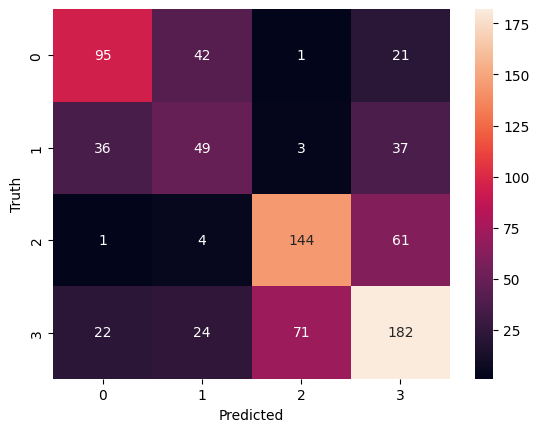

In [1772]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [1773]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [1774]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model =LogisticRegression()
nb_model = GaussianNB()

In [1775]:
model_list = [dt_model, rf_model, svc_model,knn_model,lr_model,nb_model]

In [1776]:
acc_list = []
for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

In [1777]:
acc_list

[0.6027742749054225,
 0.682219419924338,
 0.6923076923076923,
 0.6443883984867591,
 0.6872635561160151,
 0.6292559899117276]

In [1778]:
model_df = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'SVC', 'KNN', 'Logistic Regression', 'Naive Bayes'], 'Accuracy': acc_list})
model_df

,Model,Accuracy
0,Decision Tree,0.602774
1,Random Forest,0.682219
2,SVC,0.692308
3,KNN,0.644388
4,Logistic Regression,0.687264
5,Naive Bayes,0.629256


In [1779]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, x, y, cv=5)
print('Cross Validation Score = ', scores)

Cross Validation Score =  [0.66456494 0.64312736 0.66456494 0.68055556 0.62373737]


Here, the logistic regression model works best

In [1780]:
lr_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1781]:
y_pred_lr = lr_model.predict(x_test)

In [1782]:
accuracy_score(y_test, y_pred_lr)

0.6872635561160151

Text(50.722222222222214, 0.5, 'Truth')

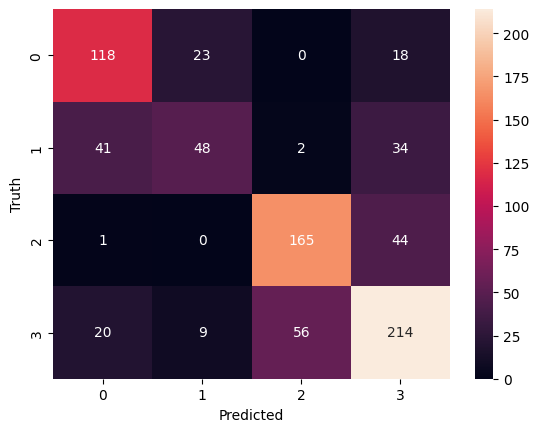

In [1783]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

For predicting temperature

In [1784]:
df['templag1'] = df['temp'].shift(-1)

In [1785]:
df = df.ffill()

In [1786]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)
y_pred_rr = rr.predict(x_test)

In [1787]:
predictors = df.columns[~df.columns.isin(['templag1'])]

In [1788]:
def backtest(df, model, predictors, start=50, step=10):
    all_predictions = []
    for i in range(start, df.shape[0], step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step):]

        model.fit(train[predictors], train['templag1'])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test['templag1'], preds], axis=1)
        combined.columns = ['templag1','predictions']

        combined["difference"] = (combined['predictions'] - combined['templag1']).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [1789]:
predictions = backtest(df, rr, predictors)

In [1790]:
predictions

,templag1,predictions,difference
datetime,,,
2022-06-20,25.4,25.372322,0.027678
2022-06-21,26.0,24.918490,1.081510
2022-06-22,26.3,26.010566,0.289434
2022-06-23,26.2,25.746526,0.453474
2022-06-24,26.7,26.301785,0.398215
...,...,...,...
2016-12-06,20.9,20.299429,0.600571
2016-12-07,20.5,20.592648,0.092648
2016-12-08,19.4,20.235070,0.835070


In [1791]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions['templag1'], predictions['predictions'])

0.7526163170080645

In [1792]:
predictions.sort_values("difference", ascending=False)

,templag1,predictions,difference
datetime,,,
2025-01-07,18.1,56.810721,38.710721
2025-01-23,29.0,18.388386,10.611614
2019-09-04,23.3,29.011987,5.711987
2022-04-30,18.5,24.036556,5.536556
2024-05-17,25.3,29.596137,4.296137
...,...,...,...
2024-08-14,29.6,29.598787,0.001213
2018-09-20,28.7,28.699578,0.000422
2021-10-17,27.1,27.100372,0.000372


In [1793]:
def pct_diff(old, new):
  return (new-old)/old

def compute_rolling(df, horizon, col):
  label = f"rolling_{horizon}_{col}"

  df[label] = df[col].rolling(horizon).mean()
  df[f"{label}_pct"] = pct_diff(df[label], df[col])
  return df

rolling_horizons = [3, 7]
for horizon in rolling_horizons:
  for col in ['temp', 'feelslike', 'dew','feelslikemax','feelslikemin', 'tempmin', 'tempmax','precipprob','cloudcover','precipcover', 'humidity','conditions']:
    df = compute_rolling(df, horizon, col)


In [1794]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,rolling_7_precipprob,rolling_7_precipprob_pct,rolling_7_cloudcover,rolling_7_cloudcover_pct,rolling_7_precipcover,rolling_7_precipcover_pct,rolling_7_humidity,rolling_7_humidity_pct,rolling_7_conditions,rolling_7_conditions_pct
datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,22.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,20.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,0.2,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,8.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,12.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-06,29.6,13.1,20.6,29.0,13.1,20.5,14.1,69.0,0.0,0,...,0.0,NaN,8.514286,-1.000000,0.0,NaN,75.514286,-0.086266,0.142857,-1.0
2016-12-07,28.5,14.2,20.9,28.2,14.2,20.8,14.3,68.4,0.0,0,...,0.0,NaN,7.728571,-1.000000,0.0,NaN,74.142857,-0.077457,0.142857,-1.0
2016-12-08,28.8,14.0,20.5,28.5,14.0,20.5,14.2,69.7,0.0,0,...,0.0,NaN,7.142857,-1.000000,0.0,NaN,72.928571,-0.044270,0.142857,-1.0


In [1795]:
df = df.iloc[7:,:]

In [1796]:
df.shape

(3956, 71)

In [1797]:
df = df.fillna(0)

In [1798]:
def expand_mean(df):
  return df.expanding (1).mean()


for col in ['temp', 'feelslike', 'dew','feelslikemax','feelslikemin', 'tempmin', 'tempmax','precipprob','cloudcover','precipcover', 'humidity','conditions']:
  df[f"month_avg_{col}"] = df[col].groupby (df.index.month, group_keys=False).apply(expand_mean)
  df[f"day_avg_{col}"] = df[col].groupby (df.index.day_of_year, group_keys=False).apply(expand_mean)

In [1799]:
predictors = df.columns[~df.columns.isin(['templag1'])]

In [1800]:
predictions = backtest(df, rr, predictors)

In [1801]:
predictions

,templag1,predictions,difference
datetime,,,
2022-06-27,26.1,24.391346,1.708654
2022-06-28,25.7,24.371189,1.328811
2022-06-29,25.9,26.187082,0.287082
2022-06-30,26.3,29.454190,3.154190
2022-07-01,28.5,33.079324,4.579324
...,...,...,...
2016-12-06,20.9,20.169621,0.730379
2016-12-07,20.5,20.348976,0.151024
2016-12-08,19.4,20.126796,0.726796


In [1802]:
mean_absolute_error(predictions['templag1'], predictions['predictions'])

0.8261597454796908

In [1803]:
predictions.sort_values("difference", ascending=False)

,templag1,predictions,difference
datetime,,,
2025-01-07,18.1,88.436535,70.336535
2022-11-02,25.2,2.666877,22.533123
2025-01-23,29.0,18.106151,10.893849
2022-07-04,28.6,38.247929,9.647929
2022-11-12,23.2,32.485106,9.285106
...,...,...,...
2023-04-02,22.2,22.198003,0.001997
2016-09-21,27.6,27.598570,0.001430
2018-02-18,19.7,19.701395,0.001395


In [1804]:
predictions["difference"].round().value_counts().sort_index()

difference
0.0     1624
1.0     1754
2.0      416
3.0       72
4.0       20
5.0        6
6.0        5
8.0        3
9.0        2
10.0       1
11.0       1
23.0       1
70.0       1
Name: count, dtype: int64

<Axes: xlabel='difference'>

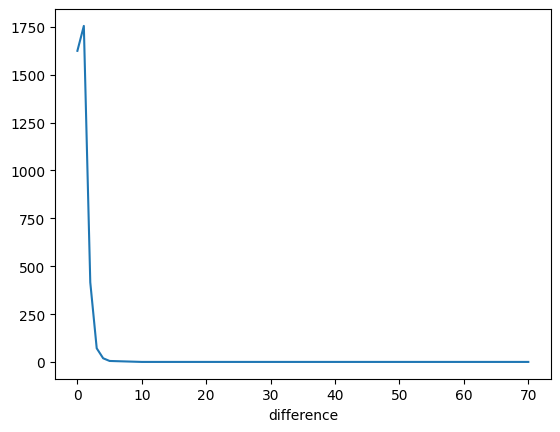

In [1805]:
predictions["difference"].round().value_counts().sort_index().plot()

In [1806]:
import joblib
import pickle

joblib.dump(rr,'temp_model.pkl')
joblib.dump(lr_model,'cond_model.pkl')

['cond_model.pkl']

In [1807]:
def clean_weather_data(df, label_encoders=None, fit_encoders=False):
    df = df.copy()

    # Fill missing values (example logic)
    df.fillna(method='ffill', inplace=True)

    # Select object columns
    obj_cols = df.select_dtypes(include='object').columns

    if fit_encoders:
        label_encoders = {}

    # Label Encode categorical variables
    for col in obj_cols:
        if fit_encoders:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
        else:
            if col in label_encoders:
                df[col] = label_encoders[col].transform(df[col].astype(str))
            else:
                df[col] = df[col].astype(str)  # Fallback

    return df, label_encoders

In [1808]:
df_cleaned, label_encoders = clean_weather_data(df, fit_encoders=True)

import joblib
joblib.dump(label_encoders, 'label_encoders.pkl')

C:\Users\USER\AppData\Local\Temp\ipykernel_7596\3624692589.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


['label_encoders.pkl']